In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
from galpy import potential,df
from galpy.orbit import Orbit
from astropy import units as u

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

# Scripts
from AxionStreams import plot as pl
from AxionStreams import orbit as orb

# Set units

kpc = u.kpc
kms = u.km/u.s
deg = u.deg
Gyr = u.Gyr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Orbit creation from sampling 

In [2]:
N_samples = 20
nframes   = 1000
T_Gyr     = 10

In [3]:
samples  = orb.orbit_sampling(N_samples)

In [4]:
Coords   = orb.orbit_coordinates(samples,T_Gyr,nframes,ctype='Cartesian')

# Timeframe, coordinate, sample number 
# Coords[0,:,0]

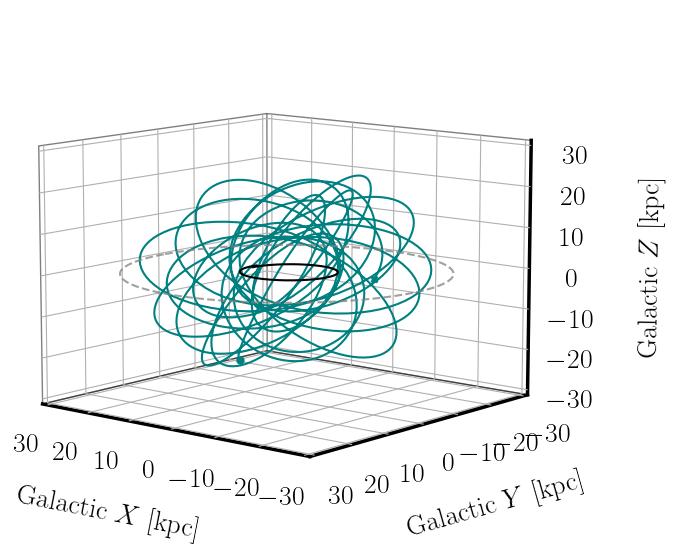

In [7]:
orbit_num = 2
pl.plot_single_orbit(Coords[:,:,orbit_num],azim=10,sun=True,lim=30,points=False,size_x=7,size_y=7)

## Density profiles from samples 

In [166]:
help(orb.get_profile)

Help on function get_profile in module AxionStreams.orbit:

get_profile(nsamples, rmax=10000, ro=8)
    Reproduces the density profile from the sampled miniclusters
    
    Use: r,rho = get_profile(nsamples,rmax=10000,ro=8)
    
    Input: 
        - nsamples: the sample array
        - rmax: maximum radius in kpc  
        - ro: scale radius in kpc
    
    Output: 
       - r: radial coordinates in kpc
       - rho: density profiles in a.u.



In [170]:
def NFW(r,r_s=19.4):
    #rho_s = 0.43 # SolarMass/pc^3
    rho_s = 1
    return 1/(r/r_s*(1+r/r_s)**2)

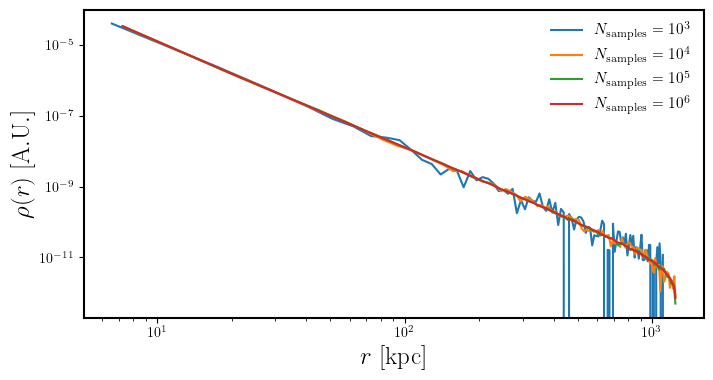

In [168]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
for i in [1e3,1e4,1e5,1e6]:
    r, rho = orb.get_profile(i)
    ax.loglog(r,rho/i,label=r'$N_{\rm samples}=10^{%d}$'%np.log10(i))
ax.set_xlabel(r'$r~[{\rm kpc}]$',fontsize=18)
ax.set_ylabel(r'$\rho(r)~[{\rm A.U.}]$',fontsize=18)
ax.legend(frameon=False,fontsize=11)
plt.show()

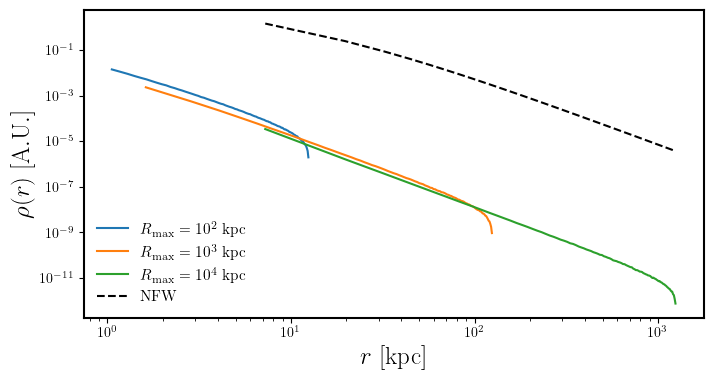

In [163]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
for rm in [100,1000,10000]: 
    r, rho = orb.get_profile(1e6,rmax=rm)
    ax.loglog(r,rho/i,label=r'$R_{\rm max}=10^{%d}~{\rm kpc}$'%np.log10(rm))
ax.loglog(r,NFW(r),c='k',ls='--',label='NFW')
ax.set_xlabel(r'$r~[{\rm kpc}]$',fontsize=18)
ax.set_ylabel(r'$\rho(r)~[{\rm A.U.}]$',fontsize=18)
ax.legend(frameon=False,fontsize=11)
plt.show()

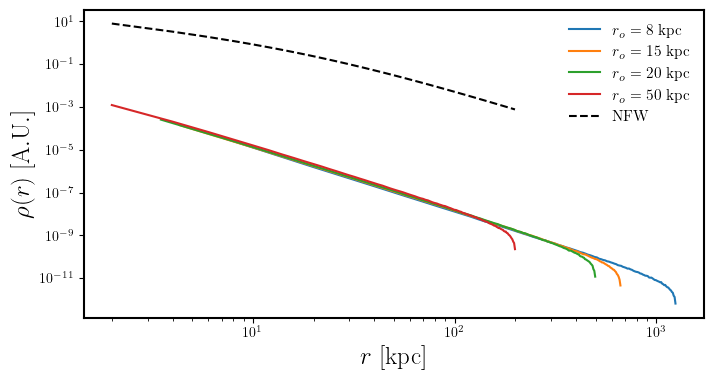

In [164]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
for ro in [8,15,20,50]: 
    r, rho = orb.get_profile(1e6,ro=ro)
    ax.loglog(r,rho/i,label=r'$r_o=%d~{\rm kpc}$'%(ro))
ax.loglog(r,NFW(r),c='k',ls='--',label='NFW')
ax.set_xlabel(r'$r~[{\rm kpc}]$',fontsize=18)
ax.set_ylabel(r'$\rho(r)~[{\rm A.U.}]$',fontsize=18)
ax.legend(frameon=False,fontsize=11)
plt.show()

In [169]:
# Save samples to txt/csv file 
# Initialisation of orbits from samples only 

# N_samples = int(1e6)

# pot  = potential.NFWPotential()
# distr_funct = df.isotropicNFWdf(pot=pot,rmax=10000*kpc,ro=8*kpc)#,rmax=200*kpc,vo=230*kms)#,ro=5*kpc)
# samples = distr_funct.sample(n=N_samples,return_orbit=False)
# R_i = samples[0]

In [171]:
# fig,ax = plt.subplots(1,1,figsize=(8,4))
# ax.loglog(rc,NFW(rc))
# ax.loglog(rc,rho)
# plt.show()

In [9]:
# For stellar density
# x,y,z should all be in kpc, and the rho it gives will be in solar masses per pc^3
# rhoR is the bulge, rhoz1 is the thin disk, and rhoz2 is the thick disk

# def rhoR(x,y,z):
#     R = sqrt(x**2 + y**2)
#     rp = sqrt(R**2.0+(z/0.5)**2.0)
#     return 95.6*1000/((1.0+(rp/0.075))**1.8)*exp(-(rp/2.1)**2.0)

# def rhoz1(x,y,z):
#     R = sqrt(x**2 + y**2+z**2.0)
#     return 816.6/(2*0.3)*exp(-abs(z)/0.3 - R/2.6)

# def rhoz2(x,y,z):
#     R = sqrt(x**2 + y**2)
#     return 209.5/(2*0.9)*exp(-abs(z)/0.9 - R/3.6)

# def rho_full(x,y,z):
#     return rhoR(x,y,z)+rhoz1(x,y,z)+rhoz2(x,y,z)

In [25]:
## Some attributes/methods of orbit class 
## samples can be replaced by any 'orbit' object

# Coordinates

# samples.r() # Spherical radius at time t
# samples.R() # Cylindrical radius at time t
# samples.theta()
# samples.x()
# samples.y()
# samples.z()

# # Velocities 

# samples.vx()
# samples.vy()
# samples.vz()
# samples.vphi() # Angular velocity

# # Time
# samples.time()

# Periods (needs to be integrated first)

# samples.Tr()
# samples.Tp()

#samples.dim()  # dimensions
#samples.dist() # return distance from the observer in kpc

# Integration 

# samples.integrate(t, pot, method='symplec4_c', progressbar=True, dt=None, numcores=2, force_map=False)

In [ ]:
# np= potential.NFWPotential(amp=1.2,a=2.3)
# #sam = sphericaldf.sample(R=None, z=None, phi=None, n=1, return_orbit=True, rmin=0.0)
# ndf= isotropicNFWdf(pot=np)
# # sample
# sam= ndf.sample(n=100)
# print(numpy.std(sam[numpy.fabs(sam.r()-1.2) < 0.1].vr()))
# # 0.2156787374302913
# # Compute vel. dispersion
# #print(ndf.sigmar(1.2))

In [ ]:
# from galpy.orbit import Orbit
# from galpy.potential import MWPotential2014
# import numpy
# import astropy.units as u
# ts= numpy.linspace(0.,1.,1001)*u.Gyr
# o = Orbit() 
# o.integrate(ts,MWPotential2014)
# o.plot()